# Fáza 2

Dávid Kromka,
Jozef Kyška 
Podiel práce 50% : 50% 
Cvičenie pondelok 11:00 
Dataset 23

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler

Načítanie súboru "labor.csv" a "profiles.csv" po identifikácií a riešení problémov v dátach v 1. fáze projektu.

In [2]:
filename = "phase1_labor.csv"
labor = pd.read_csv(filename)
labor.head()

,Unnamed: 0,hemoglobin,etytr,hbver,smoker,alt,trombocyty,erytrocyty,leukocyty,name,ssn,relationship,indicator,hematokrit,weight,alp,ast,er-cv,indicator_str
0,0,8.04859,8.33134,6.92033,no,5.32060,9.02598,7.77355,6.19725,Alicia White,269-22-8465,widowed,1.0,8.42675,101.42959,40.67505,65.03438,57.03521,1
1,1,6.51314,9.25854,9.38356,yes,4.11257,7.37351,7.33091,8.58102,Tanner Nunez,006-24-1461,widowed,1.0,8.36402,55.10746,83.65217,69.74486,59.63760,1
2,2,7.67594,9.79867,6.90776,no,18.41131,6.92801,9.53044,6.70686,Kenneth Edwards,118-32-9149,separated,0.0,9.71426,16.36442,55.94242,60.84715,51.58983,0
3,3,6.38250,9.62834,7.70289,no,1.68916,8.64702,6.15432,7.33775,Peter Cobb,564-32-8668,married,0.0,9.08956,43.53993,81.42133,67.68421,42.17631,0
4,4,7.81369,7.62289,9.16622,no,2.30729,7.42597,4.52950,5.23373,Kenneth Deleon,092-44-7767,widowed,0.0,8.35033,112.14875,49.58201,57.19260,67.20487,0


In [3]:
filename = "phase1_profiles.csv"
profiles = pd.read_csv(filename)
profiles.head()

,Unnamed: 0,blood_group,company,race,sex,address,job,ssn,name,birthdate
0,0,AB-,Lewis Group,black,F,"145 Nicole Square\nBradleyborough, MT 98980",Minerals surveyor,111-68-5386,Katherine Ortega,1998-11-17
1,1,AB+,Krueger-Herman,black,F,"7144 Luis Junction Suite 705\nPriceborough, IA...","Surveyor, building control",034-30-4283,Amanda Frank,2018-10-03
2,2,A+,Rhodes-Lynch,black,F,"24781 Lee Walk\nNorth Amy, MT 75915",Manufacturing systems engineer,376-24-8085,Ann Gray,1957-06-10
3,3,B+,Chung-Osborne,black,F,"54505 Anderson Parkways\nNorth David, NC 59887","Designer, blown glass/stained glass",259-78-9704,Stephanie Baker,1984-04-18
4,4,B-,Gibson-Berg,black,F,"731 James Streets\nCalvinberg, NC 37619",Advertising account planner,353-69-9598,Brenda Price,1966-04-27


## 1. Integrácia a čistenie dát

Pre správne fungovanie strojového učenia je potrebné transformovať včetky atribúty do numerického formátu. V textovom formáte v súbore "phase1_labor.csv" sú atribúty 'smoker', 'name' a 'relationship'. S určitosťou vieme povedať, že meno neovplyvňuje hodnotu indikátora a nebudeme s ním pracovať, z toho dôvodu ho nie je potrebné transformovať na numerickú hodnotu.

Ak atribút 'smoker' má hodnotu 'no', jeho numerická hodnota bude 0 a ak je hodnota 'yes', zmenená hodnota bude 1. Atribút 'relationship' transformujeme pomocou ordinal encoding. Číselné hodnoty sú priradené takto: 1: 'widowed', 2: 'separated', 3: 'married', 4: 'single', 5: 'divoced', 6: 'nop'.

In [4]:
# transform smoker
map_dict = {'no':0, 'yes':1}
labor["smoker"] = labor["smoker"].map(map_dict)

# transform relationship ordinal encoding
ce_relationship = ce.OrdinalEncoder(cols=['relationship'])
labor = ce_relationship.fit_transform(labor)
labor.head()

,Unnamed: 0,hemoglobin,etytr,hbver,smoker,alt,trombocyty,erytrocyty,leukocyty,name,ssn,relationship,indicator,hematokrit,weight,alp,ast,er-cv,indicator_str
0,0,8.04859,8.33134,6.92033,0,5.32060,9.02598,7.77355,6.19725,Alicia White,269-22-8465,1,1.0,8.42675,101.42959,40.67505,65.03438,57.03521,1
1,1,6.51314,9.25854,9.38356,1,4.11257,7.37351,7.33091,8.58102,Tanner Nunez,006-24-1461,1,1.0,8.36402,55.10746,83.65217,69.74486,59.63760,1
2,2,7.67594,9.79867,6.90776,0,18.41131,6.92801,9.53044,6.70686,Kenneth Edwards,118-32-9149,2,0.0,9.71426,16.36442,55.94242,60.84715,51.58983,0
3,3,6.38250,9.62834,7.70289,0,1.68916,8.64702,6.15432,7.33775,Peter Cobb,564-32-8668,3,0.0,9.08956,43.53993,81.42133,67.68421,42.17631,0
4,4,7.81369,7.62289,9.16622,0,2.30729,7.42597,4.52950,5.23373,Kenneth Deleon,092-44-7767,1,0.0,8.35033,112.14875,49.58201,57.19260,67.20487,0


V súbore "profiles.csv" transformujeme atribúty 'blood-group', 'race' a 'sex'. Zvyšné atribúty nebudeme brať do úvahy. Atribút 'blood_group' bude zmenený takto: 1: 'AB-', 2: 'AB+', 3: 'A+', 4: 'B+', 5: 'B-', 6: 'O-', 7: 'A-', 8: 'O+'. Atribút 'sex' bude zmenený takto: 0: 'F', 1: 'M'. Atribút 'race' bude zmenený takto: 1: 'black', 2: 'white', 3: 'asian', 4: 'hawaiian', 5: 'indian'.

In [5]:
# transform blood_group, race ordinal encoding
ce_ordinal = ce.OrdinalEncoder(cols=['blood_group', 'race'])
profiles = ce_ordinal.fit_transform(profiles)

# transform sex
map_dict = {'F':0, 'M':1}
profiles["sex"] = profiles["sex"].map(map_dict)

profiles.head()

,Unnamed: 0,blood_group,company,race,sex,address,job,ssn,name,birthdate
0,0,1,Lewis Group,1,0,"145 Nicole Square\nBradleyborough, MT 98980",Minerals surveyor,111-68-5386,Katherine Ortega,1998-11-17
1,1,2,Krueger-Herman,1,0,"7144 Luis Junction Suite 705\nPriceborough, IA...","Surveyor, building control",034-30-4283,Amanda Frank,2018-10-03
2,2,3,Rhodes-Lynch,1,0,"24781 Lee Walk\nNorth Amy, MT 75915",Manufacturing systems engineer,376-24-8085,Ann Gray,1957-06-10
3,3,4,Chung-Osborne,1,0,"54505 Anderson Parkways\nNorth David, NC 59887","Designer, blown glass/stained glass",259-78-9704,Stephanie Baker,1984-04-18
4,4,5,Gibson-Berg,1,0,"731 James Streets\nCalvinberg, NC 37619",Advertising account planner,353-69-9598,Brenda Price,1966-04-27


Z dát odstraníme atribúty, o ktorých už teraz vieme povedať, že nebudú mať vplyv na indikátor.

In [6]:
labor = labor.drop(columns=['indicator_str', 'weight', 'weight', 'Unnamed: 0', 'name'])
profiles = profiles.drop(columns=['company', 'address', 'job', 'Unnamed: 0', 'name'])

Jedno pozorovanie musí byť reprezentované jedným riadkom tabuľky. Na základe 'ssn' spojíme tabuľky 'labor' a 'profiles'.

In [7]:
data = pd.merge(labor, profiles, on=['ssn'])

Na ďalšie fázy už nie je potrebný atribút 'ssn', stĺpec odstraníme.

In [8]:
data = data.drop(columns=['ssn'])

Posledná nenumerická hodnota v tabuľke je 'birthdate'.

In [9]:
from datetime import datetime
birthdates = data['birthdate']

date_1900 = datetime.strptime('1900-01-01', '%Y-%m-%d')

birthdates_new = []
for birthdate in birthdates:
    birth = datetime.strptime(birthdate,'%Y-%m-%d')
    delta = birth - date_1900
    birthdates_new.append(delta.days)

data['birthdate'] = birthdates_new
#data['birthdate'] = data['birthdate'].str.replace("-","").astype(int)

In [10]:
data.head()

,hemoglobin,etytr,hbver,smoker,alt,trombocyty,erytrocyty,leukocyty,relationship,indicator,hematokrit,alp,ast,er-cv,blood_group,race,sex,birthdate
0,8.04859,8.33134,6.92033,0,5.32060,9.02598,7.77355,6.19725,1,1.0,8.42675,40.67505,65.03438,57.03521,2,2,0,34593
1,7.06975,5.87075,7.55645,1,3.00974,8.16432,6.61407,8.12903,3,0.0,5.20481,80.56262,78.69936,49.12368,2,2,0,34593
2,7.99925,8.50456,8.74478,1,6.86390,7.41719,8.10390,9.39205,3,1.0,8.05943,41.70678,73.50396,23.21061,2,2,0,34593
3,6.51314,9.25854,9.38356,1,4.11257,7.37351,7.33091,8.58102,1,1.0,8.36402,83.65217,69.74486,59.63760,3,1,1,37513
4,6.47968,5.81228,10.71625,0,2.88381,6.21111,5.73826,7.38472,5,1.0,9.81301,85.75254,57.14540,52.17063,3,1,1,37513


Všetky typy atribútov v tabuľke 'data' sú numerické.

In [11]:
data.dtypes

hemoglobin      float64
etytr           float64
hbver           float64
smoker            int64
alt             float64
trombocyty      float64
erytrocyty      float64
leukocyty       float64
relationship      int32
indicator       float64
hematokrit      float64
alp             float64
ast             float64
er-cv           float64
blood_group       int32
race              int32
sex               int64
birthdate         int64
dtype: object

### 1.1 Chýbajúce hodnoty

Prvým spôsobom je odstránenie pozorovaní s chýbajúcimi údajmi.

In [12]:
data.isna().sum()

hemoglobin      30
etytr           31
hbver           30
smoker           0
alt             30
trombocyty      30
erytrocyty      30
leukocyty       30
relationship     0
indicator        0
hematokrit      30
alp             30
ast             31
er-cv           31
blood_group      0
race             0
sex              0
birthdate        0
dtype: int64

In [13]:
def delete_nan(data):
 return data.dropna(axis=0)

data_nan = delete_nan(data)
print(f'Tvar pred odstránením NaN hodnôt: {data.shape}, po odstránení: {data_nan.shape}, rozdiel: {data.shape[0]-data_nan.shape[0]} riadkov.')
data = data_nan

Tvar pred odstránením NaN hodnôt: (10000, 18), po odstránení: (9673, 18), rozdiel: 327 riadkov.


Druhým spôsobom je nahradenie chýbajúcej hodnoty mediánom.

In [14]:
def median_nan(data):
    imputer_median = SimpleImputer(missing_values = np.nan, strategy ='mean')
    imputer_median = imputer_median.fit(data)
    return pd.DataFrame(imputer_median.transform(data), columns = data.columns)
data_median = median_nan(data)

Tretím spôsobom je nahradenie chýbajúcej hodnoty priemerom.

In [15]:
def mean_nan(data):
    imputer_mean = SimpleImputer(missing_values = np.nan, strategy ='mean')
    imputer_mean = imputer_mean.fit(data)
    return pd.DataFrame(imputer_mean.transform(data), columns = data.columns)
data_mean = mean_nan(data)

štvrtým spôsobom je nahradenie chýbajúcej hodnoty pomocou k-nearest neighbors (KNN) algoritmu.

In [16]:
def knn_nan(data):
    imputer = KNNImputer()
    imputer.fit(data)
    return pd.DataFrame(imputer.transform(data), columns = data.columns)
data_knn = knn_nan(data)

### 1.2 Vychýlené hodnoty

Identifikácia vychýlených hodnôt prostredníctvom 3-násobku štandardnej odchýlky od priemeru.

In [17]:
mean, std = np.mean(data), np.std(data)
out_range = 3 * std
lower, upper = mean - out_range, mean + out_range

Nájdenie všetkých vychýlených hodnôt a ošetrenie dvomi metódamy, odstránenením týchto hodnôt z dát a nahradenie týchto hodnôt hraničnýými hodnotami. DataFrame data_border predstavuje dáta bez vychýlených hodnôt v DataFrame data_border sa nachádzajú záznamy v pôovodnom poradí so zmenenými vychýlenými hodnotami na hraničné hodnoty. DataFrame otliers obsahuje iba záznamy s vychýlenými hodnotami.

In [18]:
outliers = []
data_out = []
data_border = []

def manage(row):
    for i in range(len(row)):
        if row[i] < lower.values[i]:
            row[i] = lower.values[i]
        elif  row[i] > upper.values[i]:
            row[i] = upper.values[i]
    return row

def outOutliers(data):
    for row in data.values:
        for i in range(len(row)):
            if row[i] < lower.values[i] or row[i] > upper.values[i]:
                outliers.append(row)
                data_border.append(manage(row))
                break
            else:
                if i == len(row) - 1:
                    data_out.append(row)
                    data_border.append(row)

outOutliers(data)
outliers = pd.DataFrame(outliers, columns = data.columns)
data_out = pd.DataFrame(data_out, columns = data.columns)
data_border = pd.DataFrame(data_border, columns = data.columns)
print(f'Počet vychýlených hodnôt: {outliers.shape[0]}, počet záznamov po odstránení vychýlených hodnôt: {data_out.shape[0]}.')
data = data_out

Počet vychýlených hodnôt: 400, počet záznamov po odstránení vychýlených hodnôt: 9273.


## 2. Realizácia predspracovania dát

### 2.1 Testovacia a trénovacia množina

In [19]:
x = data.drop('indicator', axis=1)
x

,hemoglobin,etytr,hbver,smoker,alt,trombocyty,erytrocyty,leukocyty,relationship,hematokrit,alp,ast,er-cv,blood_group,race,sex,birthdate
0,8.04859,8.33134,6.92033,0.0,5.32060,9.02598,7.77355,6.19725,1.0,8.42675,40.67505,65.03438,57.03521,2.0,2.0,0.0,34593.0
1,7.06975,5.87075,7.55645,1.0,3.00974,8.16432,6.61407,8.12903,3.0,5.20481,80.56262,78.69936,49.12368,2.0,2.0,0.0,34593.0
2,7.99925,8.50456,8.74478,1.0,6.86390,7.41719,8.10390,9.39205,3.0,8.05943,41.70678,73.50396,23.21061,2.0,2.0,0.0,34593.0
3,6.51314,9.25854,9.38356,1.0,4.11257,7.37351,7.33091,8.58102,1.0,8.36402,83.65217,69.74486,59.63760,3.0,1.0,1.0,37513.0
4,6.47968,5.81228,10.71625,0.0,2.88381,6.21111,5.73826,7.38472,5.0,9.81301,85.75254,57.14540,52.17063,3.0,1.0,1.0,37513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9268,7.41285,5.46108,10.35929,0.0,3.02486,7.47343,6.65908,6.40945,5.0,9.18126,60.15868,71.03993,65.99197,4.0,2.0,0.0,14612.0
9269,6.75718,9.15128,7.57213,1.0,2.68629,6.79721,6.25926,8.51760,1.0,7.98747,77.81515,70.81704,52.71076,4.0,2.0,0.0,14612.0
9270,6.87349,7.08973,9.70552,0.0,1.58039,6.94379,5.56571,6.31337,1.0,7.75174,78.37399,83.00607,70.10314,8.0,2.0,1.0,6210.0
9271,6.23404,8.61925,7.80780,0.0,2.05330,7.43009,6.52320,7.15476,1.0,8.46357,77.31291,77.37206,46.87337,8.0,2.0,1.0,6210.0


In [20]:
y = data['indicator']
y

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
9268    1.0
9269    1.0
9270    0.0
9271    1.0
9272    0.0
Name: indicator, Length: 9273, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### 2.2 Transformácia atribútov

Na transformáciu atribútov dát pre strojové učenie je použitá technika scaling. Pomocou škálovania predchádzame rozdielom v škálovaní a distribúcii, ktoré môžu byť príčinou slabého výkonu modelu a vysokej citlivosti pre vstupné údaje a teda vyššej chybovosti.

Data Normalization

In [22]:
scaler = MinMaxScaler()

scaled = scaler.fit_transform(x_train) 
data_mm_scaled = pd.DataFrame(scaled, columns = x_train.columns)
print(x_train)
print(data_mm_scaled)

      hemoglobin    etytr     hbver  smoker       alt  trombocyty  erytrocyty  \
5752     8.05211  5.08009   7.39627     0.0  11.63109     6.75524     8.94419   
7276     8.20383  8.83966   7.53826     0.0   4.19382     7.48624     7.03347   
7354     7.44860  5.33211  11.02218     1.0   3.00469     6.91420     7.36460   
2131     6.26165  6.30979   6.90382     0.0   2.39050     8.05212     6.65065   
1814     7.87260  6.39549   7.66717     0.0   3.30393     7.27744     6.16535   
...          ...      ...       ...     ...       ...         ...         ...   
7833     6.63464  7.05545   9.05441     0.0   8.29911     8.05224     8.49669   
8279     5.67241  4.81312   8.12398     0.0   4.41652     5.43467     7.43306   
811      6.67368  6.89389  10.23336     1.0   3.24527     7.17276     7.12247   
7088     7.68289  5.80737   7.67200     1.0   2.33105     6.49525     5.60131   
6329     7.62628  6.93177   7.58441     1.0   4.48579     7.35496     7.95759   

      leukocyty  relationsh

Robust Scaling

In [23]:
scaler = RobustScaler()

scaled = RobustScaler().fit_transform(x_train)
data_rb_scaled = pd.DataFrame(scaled, columns = x_train.columns)
print(data_rb_scaled)

      hemoglobin     etytr     hbver  smoker       alt  trombocyty  \
0       0.658691 -0.854834 -0.616625     0.0  3.345538   -0.327138   
1       0.774506  0.653603 -0.527755     0.0  0.150368    0.214161   
2       0.198004 -0.753717  1.652789     1.0 -0.360502   -0.209429   
3      -0.708049 -0.361446 -0.924843     0.0 -0.624367    0.633190   
4       0.521663 -0.327061 -0.447072     0.0 -0.231943    0.059547   
...          ...       ...       ...     ...       ...         ...   
7413   -0.423329 -0.062268  0.421185     0.0  1.914066    0.633279   
7414   -1.157843 -0.961949 -0.161160     0.0  0.246043   -1.305008   
7415   -0.393528 -0.127090  1.159076     1.0 -0.257145   -0.017968   
7416    0.376848 -0.563030 -0.444049     1.0 -0.649908   -0.519658   
7417    0.333635 -0.111892 -0.498870     1.0  0.275803    0.116949   

      erytrocyty  leukocyty  relationship  hematokrit       alp       ast  \
0       1.324775   0.383777           1.0   -0.554911 -0.981985  1.263269   
1    

    Druhou technikou je transformácia, ktorá zabezpečí, aby boli dáta vo viac normálnom (gausovom) tvare.

Power transformer

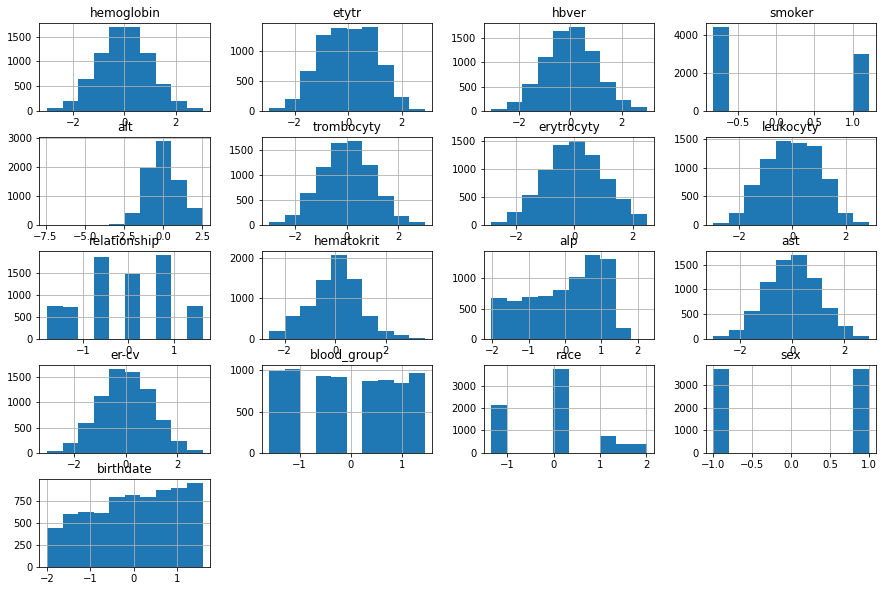

In [24]:
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer 

plt.rcParams['figure.figsize'] = [15, 10]

data_power = x_train.values[:, :]

pt = PowerTransformer(method='yeo-johnson')
data_power = pt.fit_transform(data_power)

data_power = pd.DataFrame(data_power, columns = x_train.columns)
fig = data_power.hist() 

Quantile Transformer

In [25]:
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer()
X_t = qt.fit_transform(x_train)
data_quantile = pd.DataFrame(X_t, columns = x_train.columns)
print(data_quantile)
print(data)

      hemoglobin     etytr     hbver  smoker       alt  trombocyty  \
0       0.817842  0.100987  0.205245     0.0  0.978485    0.329457   
1       0.855719  0.824843  0.240004     0.0  0.581448    0.621111   
2       0.604556  0.134874  0.985517     1.0  0.263004    0.385430   
3       0.173246  0.319484  0.108346     0.0  0.106239    0.806210   
4       0.764870  0.336820  0.275823     0.0  0.350540    0.532647   
...          ...       ...       ...     ...       ...         ...   
7413    0.284793  0.471504  0.717100     0.0  0.921508    0.806235   
7414    0.059950  0.070899  0.419077     0.0  0.623063    0.038071   
7415    0.298328  0.438443  0.937498     1.0  0.333932    0.488458   
7416    0.692238  0.215499  0.277368     1.0  0.094493    0.244381   
7417    0.670649  0.446185  0.252472     1.0  0.638738    0.565595   

      erytrocyty  leukocyty  relationship  hematokrit       alp       ast  \
0       0.973831   0.689268      1.000000    0.256120  0.160774  0.955384   
1    

## 3. Výber atribútov pre strojové učenie

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

Pri výbere atribútov na strojové učenie sme vyskúšali niekoľko techník, každú techniko pre rôzne spôsoby transformácie dát, a porovnali ich výsledky. Prvou technikou je mutual information regression.

Mutual information regression pre MinMaxScaler:

In [27]:
r = mutual_info_regression(data_mm_scaled, y_train)
result = pd.DataFrame({"atribut":list(x_train.columns), "vysledok": r})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok
9,hematokrit,0.116765
0,hemoglobin,0.020085
1,etytr,0.013979
7,leukocyty,0.009320
15,sex,0.008399
10,alp,0.008322
3,smoker,0.007752
16,birthdate,0.007448
12,er-cv,0.006284
5,trombocyty,0.003931


Mutual information regression pre Robust Scaling:

In [28]:
r = mutual_info_regression(data_rb_scaled, y_train)
result = pd.DataFrame({"atribut":list(x_train.columns), "vysledok": r})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok
9,hematokrit,0.116580
0,hemoglobin,0.020202
1,etytr,0.014198
7,leukocyty,0.009482
10,alp,0.008322
16,birthdate,0.008273
12,er-cv,0.006329
5,trombocyty,0.004100
4,alt,0.003307
11,ast,0.000017


Mutual information regression pre Power Transformer:

In [29]:
r = mutual_info_regression(data_power, y_train)
result = pd.DataFrame({"atribut":list(x_train.columns), "vysledok": r})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok
9,hematokrit,0.116768
0,hemoglobin,0.020545
3,smoker,0.015145
1,etytr,0.013898
7,leukocyty,0.009565
10,alp,0.008327
16,birthdate,0.006809
12,er-cv,0.006299
13,blood_group,0.004418
5,trombocyty,0.004068


Mutual information regression pre Quantile Transformer:

In [30]:
r = mutual_info_regression(data_quantile, y_train)
result = pd.DataFrame({"atribut":list(x_train.columns), "vysledok": r})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok
9,hematokrit,0.117653
0,hemoglobin,0.020667
1,etytr,0.014588
7,leukocyty,0.011107
12,er-cv,0.006379
16,birthdate,0.006194
10,alp,0.005029
5,trombocyty,0.002570
4,alt,0.002548
11,ast,0.000678


Ďalšou metódou výberu atribútov pre strojové učenie je chi-squared štatistika. Predpokladajú sa nezáporné hodnoty, čiže možno použiť iba ak sme pri transformácii použili MinMaxScaling alebo Quantile Transformer

In [31]:
from sklearn.feature_selection import chi2

r1, r2 = chi2(data_mm_scaled, y_train)
result = pd.DataFrame({"atribut":list(data_mm_scaled.columns), "vysledok": r1, "p value": r2})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok,p value
9,hematokrit,59.787727,1.056602e-14
15,sex,0.910669,3.399370e-01
13,blood_group,0.627575,4.282461e-01
7,leukocyty,0.401204,5.264679e-01
8,relationship,0.352164,5.528905e-01
14,race,0.164493,6.850530e-01
3,smoker,0.040459,8.405866e-01
0,hemoglobin,0.030579,8.611826e-01
1,etytr,0.024141,8.765262e-01
10,alp,0.013293,9.082124e-01


In [32]:
r1, r2 = chi2(data_quantile, y_train)
result = pd.DataFrame({"atribut":list(data_mm_scaled.columns), "vysledok": r1, "p value": r2})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok,p value
9,hematokrit,158.794556,2.075054e-36
7,leukocyty,2.131568,1.442931e-01
15,sex,0.910669,3.399370e-01
13,blood_group,0.568131,4.510027e-01
8,relationship,0.351028,5.535319e-01
14,race,0.217087,6.412687e-01
10,alp,0.060123,8.063017e-01
2,hbver,0.043904,8.340324e-01
3,smoker,0.040459,8.405866e-01
12,er-cv,0.030083,8.623013e-01


Feature selection podľa f regresie:

Pre MinMaxScaler: 

In [33]:
from sklearn.feature_selection import f_regression

r1, r2 = f_regression(data_mm_scaled, y_train)
result = pd.DataFrame({"atribut":list(x_train.columns), "vysledok": r1, "p value": r2})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok,p value
9,hematokrit,1300.898370,1.278384e-262
7,leukocyty,7.076351,7.827594e-03
13,blood_group,2.776251,9.571413e-02
8,relationship,2.261748,1.326469e-01
15,sex,1.822277,1.770837e-01
14,race,0.662690,4.156381e-01
0,hemoglobin,0.561047,4.538626e-01
1,etytr,0.405459,5.243029e-01
10,alp,0.164503,6.850557e-01
2,hbver,0.121178,7.277705e-01


Pre Robust Scaling:

In [34]:
r1, r2 = f_regression(data_rb_scaled, y_train)
result = pd.DataFrame({"atribut":list(x_train.columns), "vysledok": r1, "p value": r2})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok,p value
9,hematokrit,1300.898370,1.278384e-262
7,leukocyty,7.076351,7.827594e-03
13,blood_group,2.776251,9.571413e-02
8,relationship,2.261748,1.326469e-01
15,sex,1.822277,1.770837e-01
14,race,0.662690,4.156381e-01
0,hemoglobin,0.561047,4.538626e-01
1,etytr,0.405459,5.243029e-01
10,alp,0.164503,6.850557e-01
2,hbver,0.121178,7.277705e-01


Pre Power Transformer:

In [35]:
r1, r2 = f_regression(data_power, y_train)
result = pd.DataFrame({"atribut":list(x_train.columns), "vysledok": r1, "p value": r2})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok,p value
9,hematokrit,1151.737710,8.391033e-235
7,leukocyty,7.022972,8.064135e-03
13,blood_group,2.985910,8.403370e-02
8,relationship,2.122337,1.452072e-01
15,sex,1.822277,1.770837e-01
14,race,0.869762,3.510517e-01
0,hemoglobin,0.556369,4.557507e-01
1,etytr,0.474283,4.910448e-01
10,alp,0.320965,5.710452e-01
2,hbver,0.154795,6.940057e-01


Pre Quantile Transformer:

In [36]:
r1, r2 = f_regression(data_quantile, y_train)
result = pd.DataFrame({"atribut":list(data_quantile.columns), "vysledok": r1, "p value": r2})
result = result.sort_values("vysledok", ascending=0)
result

,atribut,vysledok,p value
9,hematokrit,1092.546381,1.252459e-223
7,leukocyty,12.805002,3.479006e-04
13,blood_group,2.885797,8.940570e-02
8,relationship,1.964209,1.611057e-01
15,sex,1.822277,1.770837e-01
14,race,0.936788,3.331367e-01
10,alp,0.360566,5.482104e-01
2,hbver,0.263288,6.078858e-01
12,er-cv,0.180411,6.710322e-01
0,hemoglobin,0.128276,7.202362e-01


Použili sme aj wrapper feature selection metódy pomocou SelectFromModel, znovu pre všetky použité metódy transformácie dát:

Pre MinMaxScaler: 

In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(estimator=LogisticRegression()).fit(data_mm_scaled, y_train)
print(selector.estimator_.coef_)
print(selector.threshold_)
selected = pd.DataFrame({"attribute":list(data_mm_scaled.columns), "selected": selector.get_support()})
print(selected)

X_new = selector.transform(data_mm_scaled)
print(X_new.shape)
X_new

[[ 5.36499281e-01 -1.38113077e+00 -1.93156404e+00  5.22516785e-03
  -9.71550535e-02 -7.27708254e-03  5.81473011e-02  1.47367272e+00
   1.43108310e-01  6.53430965e+00  4.09760904e-01 -3.39705045e-02
  -3.03548340e-02 -1.36420336e-01 -1.24586737e-01 -1.05419307e-01
   3.26686136e-03]]
0.7654040505473184
       attribute  selected
0     hemoglobin     False
1          etytr      True
2          hbver      True
3         smoker     False
4            alt     False
5     trombocyty     False
6     erytrocyty     False
7      leukocyty      True
8   relationship     False
9     hematokrit      True
10           alp     False
11           ast     False
12         er-cv     False
13   blood_group     False
14          race     False
15           sex     False
16     birthdate     False
(7418, 4)


array([[0.27579068, 0.35972809, 0.61757942, 0.41248362],
       [0.67248445, 0.37949909, 0.7564754 , 0.4629842 ],
       [0.30238276, 0.86460783, 0.60739921, 0.56344452],
       ...,
       [0.46717511, 0.75477079, 0.62833281, 0.63767197],
       [0.35253016, 0.39812134, 0.33783073, 0.42451841],
       [0.47117205, 0.38592512, 0.66987304, 0.24838009]])

Pre Robust Scaling:

In [38]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(data_rb_scaled, y_train)
print(selector.estimator_.coef_)
print(selector.threshold_)
selected = pd.DataFrame({"attribute":list(data_rb_scaled.columns), "selected": selector.get_support()})
print(selected)


X_new = selector.transform(data_rb_scaled)
print(X_new.shape)
X_new

[[ 0.13501707 -0.40085561 -0.46657343  0.00560401 -0.01871989 -0.00172928
   0.02007418  0.4141388   0.05719545  1.36098487  0.15237189 -0.00847773
  -0.00722293 -0.07902444 -0.0319813  -0.10843656  0.00181579]]
0.192366072274719
       attribute  selected
0     hemoglobin     False
1          etytr      True
2          hbver      True
3         smoker     False
4            alt     False
5     trombocyty     False
6     erytrocyty     False
7      leukocyty      True
8   relationship     False
9     hematokrit      True
10           alp     False
11           ast     False
12         er-cv     False
13   blood_group     False
14          race     False
15           sex     False
16     birthdate     False
(7418, 4)


array([[-0.85483352, -0.61662484,  0.38377727, -0.55491082],
       [ 0.65360276, -0.527755  ,  0.92594518, -0.30002658],
       [-0.7537166 ,  1.65278864,  0.34403977,  0.20701228],
       ...,
       [-0.12709026,  1.15907569,  0.42575217,  0.5816497 ],
       [-0.56303006, -0.44404874, -0.70819645, -0.49416937],
       [-0.11189183, -0.49887027,  0.5879007 , -1.3831668 ]])

Pre Power Transformer:

In [39]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(data_power, y_train)
print(selector.estimator_.coef_)
print(selector.threshold_)
selected = pd.DataFrame({"attribute":list(data_power.columns), "selected": selector.get_support()})
print(selected)

X_new = selector.transform(data_power)
print(X_new.shape)
X_new

[[ 0.10514965 -0.24032302 -0.34084142  0.00343983 -0.04497061 -0.00114434
   0.03761873  0.25895445  0.03897593  1.09120677  0.10995248 -0.00602025
  -0.00461926 -0.04734615 -0.03551946 -0.05416788  0.00171449]]
0.14246851329472457
       attribute  selected
0     hemoglobin     False
1          etytr      True
2          hbver      True
3         smoker     False
4            alt     False
5     trombocyty     False
6     erytrocyty     False
7      leukocyty      True
8   relationship     False
9     hematokrit      True
10           alp     False
11           ast     False
12         er-cv     False
13   blood_group     False
14          race     False
15           sex     False
16     birthdate     False
(7418, 4)


array([[-1.30366073, -0.82164294,  0.58331037, -0.59327311],
       [ 0.9977348 , -0.70068246,  1.40417432, -0.29391114],
       [-1.1474497 ,  2.1918131 ,  0.52341353,  0.33365411],
       ...,
       [-0.1861741 ,  1.54828884,  0.646621  ,  0.82414268],
       [-0.85373929, -0.58700114, -1.04718543, -0.52292463],
       [-0.16299099, -0.66142687,  0.89157979, -1.489029  ]])

Pre Quantile Transformer:

In [40]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(data_quantile, y_train)
print(selector.estimator_.coef_)
print(selector.threshold_)
selected = pd.DataFrame({"attribute":list(data_quantile.columns), "selected": selector.get_support()})
print(selected)


X_new = selector.transform(data_quantile)
print(X_new.shape)
X_new

[[ 0.33165184 -0.84019455 -1.15281076  0.01231275 -0.16089729  0.0179818
   0.13300028  0.72642416  0.11267988  3.4725106   0.37201793 -0.02939289
   0.00734216 -0.14156375 -0.11303467 -0.098753    0.00557737]]
0.45459680525952845
       attribute  selected
0     hemoglobin     False
1          etytr      True
2          hbver      True
3         smoker     False
4            alt     False
5     trombocyty     False
6     erytrocyty     False
7      leukocyty      True
8   relationship     False
9     hematokrit      True
10           alp     False
11           ast     False
12         er-cv     False
13   blood_group     False
14          race     False
15           sex     False
16     birthdate     False
(7418, 4)


array([[0.10098735, 0.2052453 , 0.68926781, 0.25612033],
       [0.82484262, 0.2400035 , 0.92190639, 0.35343387],
       [0.13487358, 0.98551686, 0.67103549, 0.62403841],
       ...,
       [0.43844271, 0.93749846, 0.71132943, 0.82089739],
       [0.21549929, 0.27736837, 0.16643239, 0.27468819],
       [0.44618495, 0.25247166, 0.79217147, 0.08785775]])

SelectFromModel s L1 based feature selection:

Pre MinMaxScaler: 

In [41]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(data_mm_scaled, y_train)
selector = SelectFromModel(estimator=lsvc, prefit=True)
selected = pd.DataFrame({"attribute":list(data_mm_scaled.columns), "selected": selector.get_support()})
print(selected)

X_new = selector.transform(data_mm_scaled)
print(X_new.shape)
X_new

       attribute  selected
0     hemoglobin     False
1          etytr      True
2          hbver      True
3         smoker     False
4            alt     False
5     trombocyty     False
6     erytrocyty     False
7      leukocyty     False
8   relationship     False
9     hematokrit      True
10           alp     False
11           ast     False
12         er-cv     False
13   blood_group      True
14          race     False
15           sex      True
16     birthdate     False
(7418, 5)


array([[0.27579068, 0.35972809, 0.41248362, 0.14285714, 0.        ],
       [0.67248445, 0.37949909, 0.4629842 , 0.42857143, 1.        ],
       [0.30238276, 0.86460783, 0.56344452, 0.85714286, 1.        ],
       ...,
       [0.46717511, 0.75477079, 0.63767197, 0.85714286, 0.        ],
       [0.35253016, 0.39812134, 0.42451841, 0.28571429, 1.        ],
       [0.47117205, 0.38592512, 0.24838009, 0.        , 0.        ]])

Pre Robust Scaling:

In [42]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(data_rb_scaled, y_train)
selector = SelectFromModel(estimator=lsvc, prefit=True)
selected = pd.DataFrame({"attribute":list(data_rb_scaled.columns), "selected": selector.get_support()})
print(selected)

X_new = selector.transform(data_rb_scaled)
print(X_new.shape)
X_new



       attribute  selected
0     hemoglobin     False
1          etytr      True
2          hbver      True
3         smoker     False
4            alt     False
5     trombocyty     False
6     erytrocyty     False
7      leukocyty      True
8   relationship      True
9     hematokrit      True
10           alp     False
11           ast     False
12         er-cv     False
13   blood_group      True
14          race      True
15           sex      True
16     birthdate     False
(7418, 8)


array([[-0.85483352, -0.61662484,  0.38377727, ..., -0.5       ,
        -1.        , -1.        ],
       [ 0.65360276, -0.527755  ,  0.92594518, ...,  0.        ,
         0.        ,  0.        ],
       [-0.7537166 ,  1.65278864,  0.34403977, ...,  0.75      ,
         0.        ,  0.        ],
       ...,
       [-0.12709026,  1.15907569,  0.42575217, ...,  0.75      ,
         0.        , -1.        ],
       [-0.56303006, -0.44404874, -0.70819645, ..., -0.25      ,
         0.        ,  0.        ],
       [-0.11189183, -0.49887027,  0.5879007 , ..., -0.75      ,
         0.        , -1.        ]])

Pre Power Transformer:

In [43]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(data_power, y_train)
selector = SelectFromModel(estimator=lsvc, prefit=True)
selected = pd.DataFrame({"attribute":list(data_power.columns), "selected": selector.get_support()})
print(selected)

X_new = selector.transform(data_power)
print(X_new.shape)
X_new

       attribute  selected
0     hemoglobin      True
1          etytr      True
2          hbver      True
3         smoker     False
4            alt     False
5     trombocyty     False
6     erytrocyty     False
7      leukocyty      True
8   relationship      True
9     hematokrit      True
10           alp      True
11           ast     False
12         er-cv     False
13   blood_group      True
14          race      True
15           sex      True
16     birthdate     False
(7418, 10)


array([[ 0.90084997, -1.30366073, -0.82164294, ..., -1.03340363,
        -1.34475447, -1.00053937],
       [ 1.05880558,  0.9977348 , -0.70068246, ..., -0.09278226,
         0.1932455 ,  0.99946092],
       [ 0.2736398 , -1.1474497 ,  2.1918131 , ...,  1.08458915,
         0.1932455 ,  0.99946092],
       ...,
       [-0.5289725 , -0.1861741 ,  1.54828884, ...,  1.08458915,
         0.1932455 , -1.00053937],
       [ 0.51691705, -0.85373929, -0.58700114, ..., -0.54101816,
         0.1932455 ,  0.99946092],
       [ 0.45811031, -0.16299099, -0.66142687, ..., -1.59221293,
         0.1932455 , -1.00053937]])

Pre Quantile Transformer:

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(data_quantile, y_train)
selector = SelectFromModel(estimator=lsvc, prefit=True)
selected = pd.DataFrame({"attribute":list(data_quantile.columns), "selected": selector.get_support()})
print(selected)


X_new = selector.transform(data_quantile)
print(X_new.shape)
X_new

Všetky metódy sa zhodujú, že hematokrit je najdôležitejší atribút. Leukocyty boli medzi niekoľkými atribútmi s najväčšou váhou pri takmer všetkých testoch. Často boli vybrané taktiež napr. hbver, etytr, blood_group. Presný výber atribútov záleží na výbere metódy pre výber atribútov pre strojové učenie.

## 4. Replikovateľnosť predspracovania

Aby bolo možné kód použiť znova na spracovanie dát, významné časti kódu sú vo formáte funkcií a je možné ich volať z rôznych miest v rámci notebooku.

Nasledujúca funkcia vykoná predspracovanie dát (transformáciu dát a feature selection) na testovacej množine, alebo na akejkoľvek inej množine dát. Predpokladá sa, že čistenie a integrácia dát (prvý bod zadania) už boli vykonané.

Na transformáciu dát sa aplikuje MinMaxScaler, následne sa vykoná feature selection pomocou SelectFromModel s logistickou regresiou. Funkcia zároveň vypíše, ktoré atribúty boli zvolené vo feature selection.

In [44]:
from sklearn.pipeline import Pipeline

def predspracuj(data_x, data_y):
    pipe = Pipeline([('mm', MinMaxScaler()), ('lr', SelectFromModel(estimator=LogisticRegression()))])
    selector = pipe.fit(data_x, data_y)
    
    selected = pd.DataFrame({"attribute":list(data_x.columns), "selected": selector.named_steps["lr"].get_support()})
    print(selected)
    selected = selected[selected["selected"] == True]
    
    new_data_x = selector.transform(data_x)
    return new_data_x, selected['attribute']

predspracuj(x_test, y_test)

       attribute  selected
0     hemoglobin     False
1          etytr      True
2          hbver      True
3         smoker     False
4            alt     False
5     trombocyty     False
6     erytrocyty     False
7      leukocyty      True
8   relationship     False
9     hematokrit      True
10           alp     False
11           ast     False
12         er-cv     False
13   blood_group     False
14          race     False
15           sex     False
16     birthdate     False


(array([[0.22509558, 0.5034429 , 0.26446319, 0.43008949],
        [0.37152839, 0.36188088, 0.38197471, 0.5127333 ],
        [0.29532261, 0.62567789, 0.55808103, 0.37621049],
        ...,
        [0.5279106 , 0.69499551, 0.61921986, 0.13330305],
        [0.64541249, 0.47518789, 0.44438607, 0.5915333 ],
        [0.32014191, 0.26797194, 0.14122885, 0.43606303]]),
 1         etytr
 2         hbver
 7     leukocyty
 9    hematokrit
 Name: attribute, dtype: object)

Výstupom je upravená trénovacia dátová sada so zvolenými atribútmy pre strojové učenie.

In [45]:
new_frame, new_columns = predspracuj(x_train, y_train)
new_frame = pd.DataFrame(new_frame, columns = new_columns)
print(new_frame.head())
new_frame.to_csv("phase2_result.csv", index=False)

       attribute  selected
0     hemoglobin     False
1          etytr      True
2          hbver      True
3         smoker     False
4            alt     False
5     trombocyty     False
6     erytrocyty     False
7      leukocyty      True
8   relationship     False
9     hematokrit      True
10           alp     False
11           ast     False
12         er-cv     False
13   blood_group     False
14          race     False
15           sex     False
16     birthdate     False
attribute     etytr     hbver  leukocyty  hematokrit
0          0.275791  0.359728   0.617579    0.412484
1          0.672484  0.379499   0.756475    0.462984
2          0.302383  0.864608   0.607399    0.563445
3          0.405543  0.291158   0.799714    0.359395
4          0.414586  0.397449   0.332851    0.424358
